# Basic Tabular Data Viewing with Temperature and Humidity

In [1]:
!pip install pandas Pyarrow

You should consider upgrading via the 'D:\soch1\Projects\IoT_course\.venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached pandas-2.2.0-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached pyarrow-15.0.0-cp39-cp39-win_amd64.whl (24.9 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)


In [2]:
print(1+1)

2


In [4]:
import pandas as pd

# Create a DataFrame with ten records
data = {
    'Temperature': [20, 21, 19, 22, 21, 20, 23, 24, 22, 21],
    'Humidity': [30, 32, 31, 33, 32, 31, 34, 35, 33, 32]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('data_tst.csv', index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv('data_tst.csv')

# Display the DataFrame
df

,Temperature,Humidity
0,20,30
1,21,32
2,19,31
3,22,33
4,21,32
5,20,31
6,23,34
7,24,35
8,22,33
9,21,32


### This data represents the indoor air quality at different times, with temperature in °C, humidity in %, CO2 in ppm (parts per million), and TVOC (Total Volatile Organic Compounds) in ppb (parts per billion). All values are within the recommended ranges for good indoor air quality. Please note that the CO2 and TVOC values are hypothetical and may not represent typical indoor levels

In [49]:
# Load the data
df = pd.read_csv('latest_telemetry.csv')

df

,Last update time,Key,Value
0,20/02/2024 10:44,CO2,403.0
1,20/02/2024 10:44,Humidity,44.0
2,20/02/2024 10:44,TVOC,0.0
3,20/02/2024 10:44,Temperature,20.5


In [50]:
# Pivot the DataFrame
df_pivot = df.pivot(index='Last update time', columns='Key', values='Value')

# Reset the index
df_pivot.reset_index(inplace=True)

# Save the transformed data
df_pivot.head()

Key,Last update time,CO2,Humidity,TVOC,Temperature
0,20/02/2024 10:44,403.0,44.0,0.0,20.5


In [51]:
def transform_data(latest_telemetry_file, data_file):
    # Load the existing data
    df_data = pd.read_csv(data_file)

    # Load the new data
    df_latest = pd.read_csv(latest_telemetry_file)

    # Pivot the new DataFrame
    df_latest_pivot = df_latest.pivot(index='Lastupdatetime', columns='Key', values='Value')

    # Reset the index
    df_latest_pivot.reset_index(inplace=True)

    # Append the new data to the existing data
    df_combined = pd.concat([df_data, df_latest_pivot])

    return df_combined

In [8]:
def save_data(df, data_file):
    # Save the combined data
    df.to_csv(data_file, index=False)

In [56]:
#  check if .csv exists before trying to read it. If it doesn’t exist, it will create an empty DataFrame and save it as .csv
import os

def transform_data(latest_telemetry_file, data_file):
    # Check if data_file exists
    if os.path.exists(data_file):
        # Load the existing data
        df_data = pd.read_csv(data_file)
    else:
        # Create an empty DataFrame with the required columns
        df_data = pd.DataFrame(columns=['Lastupdatetime', 'Temperature', 'Humidity', 'CO2', 'TVOC'])

    # Load the new data
    df_latest = pd.read_csv(latest_telemetry_file)

    df_latest = df_latest.rename(columns={'Last update time': 'Lastupdatetime'})

    # Pivot the new DataFrame
    df_latest_pivot = df_latest.pivot(index='Lastupdatetime', columns='Key', values='Value')

    # Reset the index
    df_latest_pivot.reset_index(inplace=True)

    # Append the new data to the existing data
    df_combined = pd.concat([df_data, df_latest_pivot])

    return df_combined

## Main Function

In [57]:
latest_telemetry_file = 'latest_telemetry.csv'
data_file = 'data01.csv'

df_combined = transform_data(latest_telemetry_file, data_file)
save_data(df_combined, data_file)

In [83]:
aq = pd.read_csv('data01.csv')
aq.tail()

,Lastupdatetime,Temperature,Humidity,CO2,TVOC
1549,02/03/2024 04:34,20.5,57.0,407.5,0
1550,02/03/2024 04:44,20.5,57.4,408.0,0
1551,02/03/2024 04:54,20.5,57.8,408.5,0
1552,02/03/2024 05:04,20.5,58.2,409.0,0
1553,03/03/2024 05:04,20.5,58.6,409.5,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lastupdatetime  1554 non-null   object 
 1   Temperature     1554 non-null   float64
 2   Humidity        1554 non-null   float64
 3   CO2             1554 non-null   float64
 4   TVOC            1554 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 60.8+ KB


## Time Series 
Let's visualize the CO / temperature in hourly basis.

In [85]:
#For dealing with time string types
import datetime

In [86]:
aq.Lastupdatetime = aq.Lastupdatetime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M'))
aq.head()

,Lastupdatetime,Temperature,Humidity,CO2,TVOC
0,2024-02-20 10:34:00,21.0,45.0,405.0,0
1,2024-02-20 10:34:00,21.0,45.0,405.0,0
2,2024-02-20 10:44:00,20.5,44.0,403.0,0
3,2024-02-20 10:54:00,21.5,50.0,400.0,0
4,2024-02-20 11:04:00,22.0,55.0,410.0,0


In [87]:
aq = aq.rename(columns={'Lastupdatetime':'DateTime'})

In [88]:
aq.head()

,DateTime,Temperature,Humidity,CO2,TVOC
0,2024-02-20 10:34:00,21.0,45.0,405.0,0
1,2024-02-20 10:34:00,21.0,45.0,405.0,0
2,2024-02-20 10:44:00,20.5,44.0,403.0,0
3,2024-02-20 10:54:00,21.5,50.0,400.0,0
4,2024-02-20 11:04:00,22.0,55.0,410.0,0


In [89]:
aq['Weekday'] = aq['DateTime'].dt.day_name()
aq['Month']   = aq['DateTime'].dt.month_name()
aq['Hour']    = aq['DateTime'].dt.hour
aq['Date'] = aq['DateTime'].dt.date
aq.drop('Time', axis=1, inplace=True, errors = 'ignore') 
aq.head()

,DateTime,Temperature,Humidity,CO2,TVOC,Weekday,Month,Hour,Date
0,2024-02-20 10:34:00,21.0,45.0,405.0,0,Tuesday,February,10,2024-02-20
1,2024-02-20 10:34:00,21.0,45.0,405.0,0,Tuesday,February,10,2024-02-20
2,2024-02-20 10:44:00,20.5,44.0,403.0,0,Tuesday,February,10,2024-02-20
3,2024-02-20 10:54:00,21.5,50.0,400.0,0,Tuesday,February,10,2024-02-20
4,2024-02-20 11:04:00,22.0,55.0,410.0,0,Tuesday,February,11,2024-02-20


In [90]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June', 
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in months:
    temp_df = aq.loc[(aq['Month'] == month)]
    month_df_list.append(temp_df)

for day in days:
    temp_df = aq.loc[(aq['Weekday'] == day)]
    day_df_list.append(temp_df)

for hour in range(24):
    temp_df = aq.loc[(aq['Hour'] == hour)]
    hour_df_list.append(temp_df)

In [91]:
#For plotting
import matplotlib.pyplot as plt

In [92]:

def df_time_plotter(df_list, time_unit, y_col):
    
    months = ['January','February','March', 'April', 'May','June', 
              'July', 'August', 'September', 'October', 'November', 'December']
    
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    if time_unit == 'M':
        nRows = 3
        nCols = 4
        n_iter = len(months)
    elif time_unit == 'D':
        nRows = 2
        nCols = 4
        n_iter = len(days)
    elif time_unit == 'H':
        nRows = 4
        nCols = 6
        n_iter = 24
    else:
        print('time_unit must be a string equal to M,D, or H')
        return 0
        
    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (40,30))
    axs = axs.ravel()
    for i in range(n_iter):
        data = df_list[i]
        ax = axs[i]
        data.plot(kind ='scatter', x = 'DateTime', y= y_col , ax = ax, fontsize = 24)
        ax.set_ylabel('Temperature',fontsize=30)
        ax.set_xlabel('')
        if time_unit == 'M':
            ax.set_title(y_col + ' ' + months[i],  size=40) # Title
        elif time_unit == 'D':
            ax.set_title(y_col + ' ' + days[i],  size=40) # Title
        else:
             ax.set_title(y_col + ' ' + str(i),  size=40) # Title
        ax.tick_params(labelrotation=60)

        #plt.xlim([datetime.date(2004, 3, 10), datetime.date(2004, 3, 30)])
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    plt.show() # Depending on whether you use IPython or interactive mode, etc.

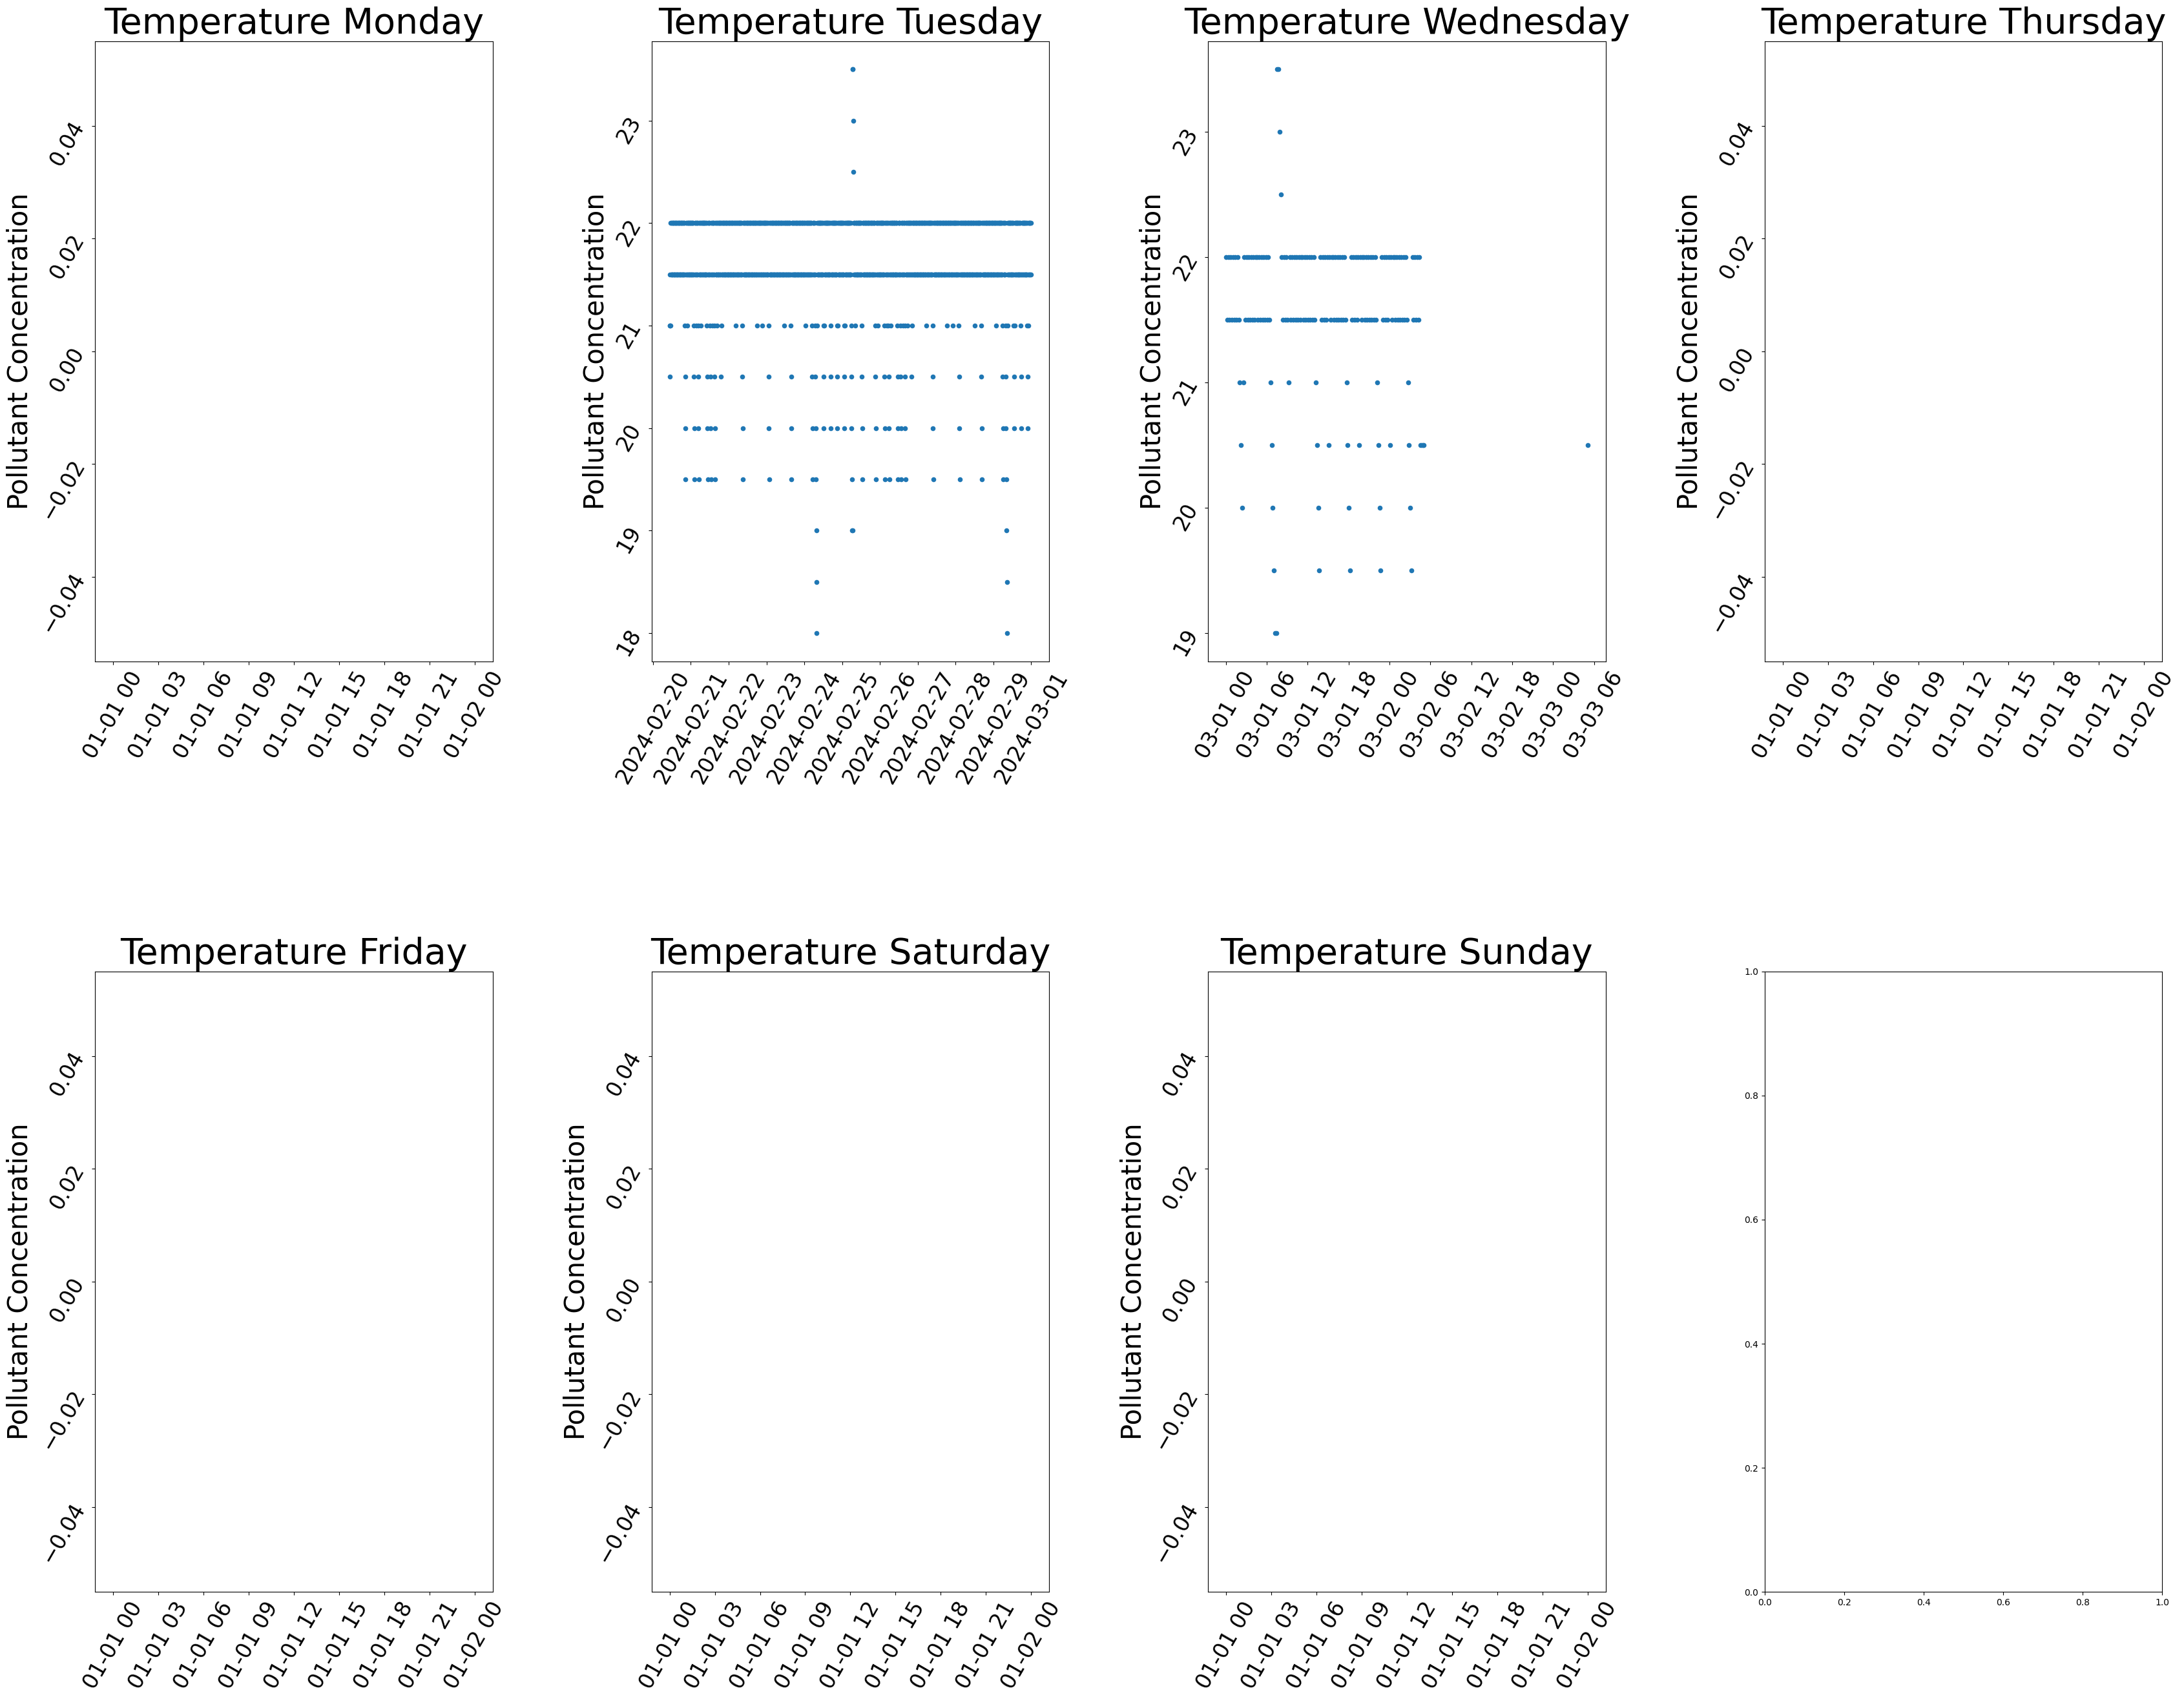

In [95]:
df_time_plotter(month_df_list,'D','Temperature')